In [1]:
print("Hello Standardization")

Hello Standardization


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./DataSets/Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df = df.iloc[:,2:]

# Train Test Split 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Purchased'],axis=1),df['Purchased'],test_size=0.3, random_state=42)

In [7]:
X_test.shape, X_train.shape

((120, 2), (280, 2))

# Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the sacler to train set, it will learn the paramter
scaler.fit(X_train)

# transfrom Train and Test Set 
X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [10]:
X_train

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [11]:
X_train_scaled

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
X_train_scaled

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


In [14]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.58,70589.29
std,10.20,33948.50
min,18.00,15000.00
25%,30.00,44000.00
50%,37.00,71000.00
75%,45.00,88000.00
max,60.00,150000.00


In [15]:
np.round(X_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.92,-1.64
25%,-0.74,-0.78
50%,-0.06,0.01
75%,0.73,0.51
max,2.20,2.34


# Graph before and After Scaling

Text(0.5, 1.0, 'Before Scaling')

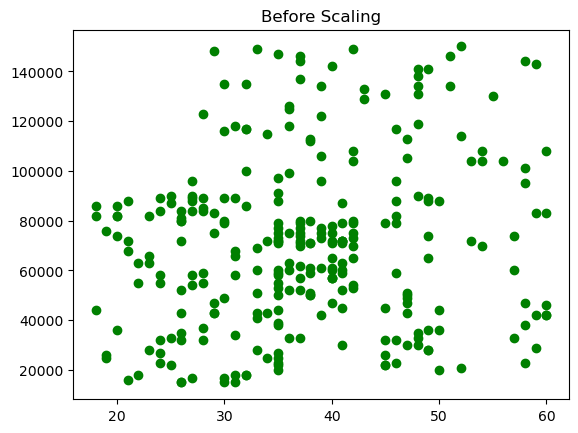

In [16]:
plt.scatter(X_train['Age'],X_train['EstimatedSalary'],color='green')
plt.title("Before Scaling")


Text(0.5, 1.0, 'After Scaling')

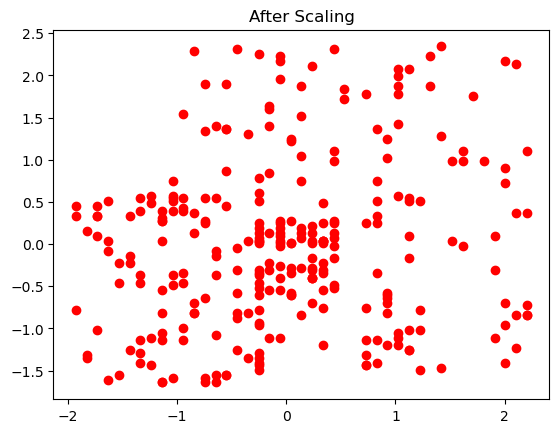

In [17]:
plt.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.title("After Scaling")

In [18]:
# Try ploting in one revising ... 

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
lr

LogisticRegression()

In [21]:
lr_scaled

LogisticRegression()

In [22]:
y_lr = lr.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score_lr = accuracy_score(y_test,y_lr)

In [25]:
accuracy_score_lr

0.6083333333333333

In [26]:
accuracy_score_lr_scaled =  accuracy_score(y_test,lr_scaled.predict(X_test_scaled))

In [27]:
accuracy_score_lr_scaled

0.85

In [28]:
accuracy_score_lr = accuracy_score(y_test,lr_scaled.predict(X_test))

In [29]:
accuracy_score_lr

0.39166666666666666

In [30]:
accuracy_score_lr = accuracy_score(y_test,lr.predict(X_test))

In [31]:
accuracy_score_lr

0.85